# Pandas + pySpark

Para este primer ejercicio se utilizará unicamente pandas como viene estándar y se medirán los tiempos de ejecución

## Carga de datos

Los datos que se utilizara para este ejercicio vienen de la base de datos de mongo son comentarios de twitter y el archivo tiene un peso de 112,2 MB

### Inicialización SparkSession

Las aplicaciones de PySpark comienzan con la inicialización, *SparkSession* que es el punto de entrada de PySpark como se muestra a continuación. En caso de ejecutarlo en el shell PySpark a través del ejecutable pyspark, el shell crea automáticamente la sesión en la variable spark para los usuarios. https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html

In [1]:
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
spark

In [3]:
spark.sparkContext._conf.getAll()

[('spark.driver.port', '35455'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.id', 'local-1618688002577'),
 ('spark.driver.host', '192.168.5.108'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell')]

In [4]:
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '20g'),
                                        ('spark.app.name', 'Spark Updated Conf'),
                                        ('spark.executor.cores', '3'),
                                        ('spark.cores.max', '4'),
                                        ('spark.driver.memory','20g')])

In [5]:
spark.sparkContext.stop()

In [6]:
spark = SparkSession.builder.config(conf=conf).getOrCreate()

In [7]:
spark.sparkContext._conf.getAll()

[('spark.driver.port', '35455'),
 ('spark.driver.host', '192.168.5.108'),
 ('spark.executor.id', 'driver'),
 ('spark.cores.max', '4'),
 ('spark.app.name', 'Spark Updated Conf'),
 ('spark.executor.memory', '20g'),
 ('spark.driver.memory', '20g'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.id', 'local-1618688002577'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.cores', '3'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [8]:
import timeit
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from pyspark.sql import functions as F
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [9]:
def plot_time(time_list, name):
    plt.figure(figsize=(14, 4))
    p = sum(time_list) / num
    plt.scatter(range(len(load_data)), time_list, color='blue')
    plt.title('Tiempo por ejecución de: {}, tiempo promedio {} seg'.format(name, round(p, 3)))
    plt.hlines(y=p, xmin=0, xmax=len(time_list), color='red')
    plt.ylabel('Tiempo en segundos')
    plt.xlabel('Ejecuciones')
    plt.show()

In [10]:
# numero de veces a repetir cada prueba
num = 5

In [11]:
FOLDER_DATA = '/home/oscar/Labs/Data_Opt_Big_Data/'
FILE = 'twitter_lib_tweetreply.csv'

In [12]:
df = spark.read.csv(FOLDER_DATA + FILE,
                    header=True,
                    inferSchema='true',
                    multiLine=False)

In [13]:
df.count()

180351

In [14]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- tweet_id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- twitter_id: string (nullable = true)
 |-- screen_name: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- account_created_at: string (nullable = true)
 |-- ac_location: string (nullable = true)
 |-- ac_verified: string (nullable = true)
 |-- ac_followers_count: string (nullable = true)
 |-- ac_friends_count: string (nullable = true)
 |-- ac_favourites_count: string (nullable = true)
 |-- ac_statuses_count: string (nullable = true)
 |-- ac_listed_count: string (nullable = true)
 |-- quote_count: string (nullable = true)
 |-- reply_count: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- favorite_count: string (nullable = true)
 |-- source: string (nullable = true)
 |-- in_reply_to_status_id: string (nullable = t

In [15]:
load_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = spark.read.csv(FOLDER_DATA + FILE, header=True, inferSchema='true')
    load_data.append(timeit.default_timer() - start_time)

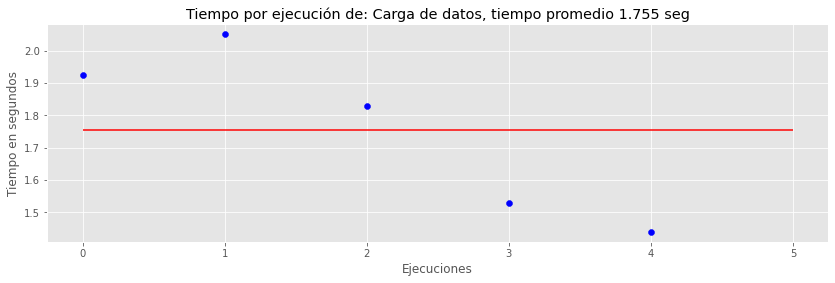

In [16]:
plot_time(load_data, name='Carga de datos')

In [17]:
df.columns

['_id',
 'id',
 'tweet_id',
 'created_at',
 'text',
 'twitter_id',
 'screen_name',
 'name',
 'description',
 'account_created_at',
 'ac_location',
 'ac_verified',
 'ac_followers_count',
 'ac_friends_count',
 'ac_favourites_count',
 'ac_statuses_count',
 'ac_listed_count',
 'quote_count',
 'reply_count',
 'retweet_count',
 'favorite_count',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'coordinates',
 'place_id',
 'is_quote_status',
 'quoted_status_id',
 'quoted_status_permalink',
 'retweeted_status',
 'hashtags',
 'extended_hashtags',
 'urls',
 'user_mentions',
 'extended_user_mentions',
 'symbols',
 'possibly_sensitive',
 'lang',
 'media_entities',
 'replying_to_id',
 'replying_to',
 'account_id',
 'profile_image']

In [18]:
df.count()

180351

In [19]:
df.show(n=2)

+--------------------+---+-------------------+--------------------+--------------------+-------------------+--------------+-------------+--------------------+--------------------+--------------------+-----------+------------------+----------------+-------------------+-----------------+---------------+-----------+-----------+-------------+--------------+--------------------+---------------------+-------------------+-----------------------+-----------+--------+---------------+----------------+-----------------------+----------------+--------+-----------------+----+-------------+----------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----------+--------------------+--------------------+
|                 _id| id|           tweet_id|          created_at|                text|         twitter_id|   screen_name|         name|         description|  account_created_at|         ac_location|ac_verified|ac_followers_count|ac_frie

## Agrupación por cuentas

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

**Nota:** Para poder comparar los datos con pySpark se deben cargar los datos en el mismo código, pues esta librería carga los datos en memoria cuando se necesitan operar

In [20]:
g_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = spark.read.csv(FOLDER_DATA + FILE,
                        header=True,
                        inferSchema='true',
                        multiLine=True)
    df_group_page = df.groupBy('in_reply_to_screen_name').count() 
    g_data.append(timeit.default_timer() - start_time)

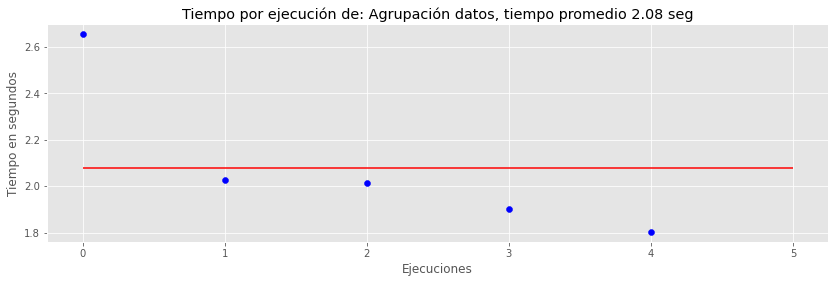

In [21]:
plot_time(g_data, name='Agrupación datos')

In [22]:
df_group_page.show(5)

+-----------------------+-----+
|in_reply_to_screen_name|count|
+-----------------------+-----+
|   "<a href=""http:/...|    2|
|   "<a href=""https:...|    7|
|   "[{""text"": ""de...|    1|
|           mattelsa_net| 1257|
|                     42|    1|
+-----------------------+-----+
only showing top 5 rows



In [23]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_page = df_group_page.orderBy("count",ascending=False)
    s_data.append(timeit.default_timer() - start_time)

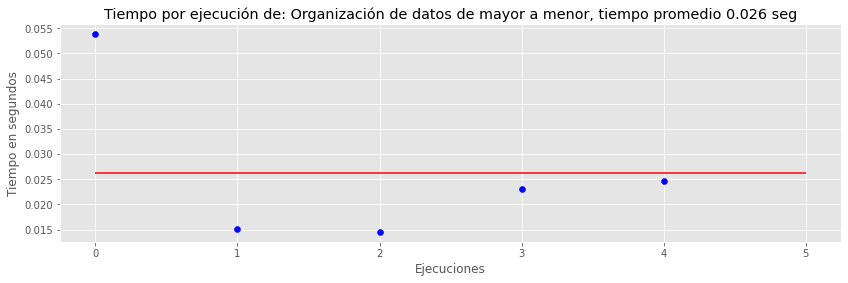

In [24]:
plot_time(s_data, name='Organización de datos de mayor a menor')

In [25]:
df_group_page.show(5)

+-----------------------+------+
|in_reply_to_screen_name| count|
+-----------------------+------+
|             netflixlat|100639|
|                   null| 13292|
|          rappicolombia|  6167|
|           mattelsa_net|  1257|
|        spotifycolombia|   992|
+-----------------------+------+
only showing top 5 rows



## Agrupación de datos por cuentas y publicaciones

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta y la publicación es decir los comentarios por cuenta y publicación
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

In [26]:
g_data2 = []
for i in range(num):
    start_time = timeit.default_timer()
    df = spark.read.csv(FOLDER_DATA + FILE,
                        header=True,
                        inferSchema='true',
                        multiLine=True)
    df_group_pub = df.groupBy('in_reply_to_screen_name').agg({'screen_name': 'last',
                                                              'name': 'count'})
    g_data2.append(timeit.default_timer() - start_time)

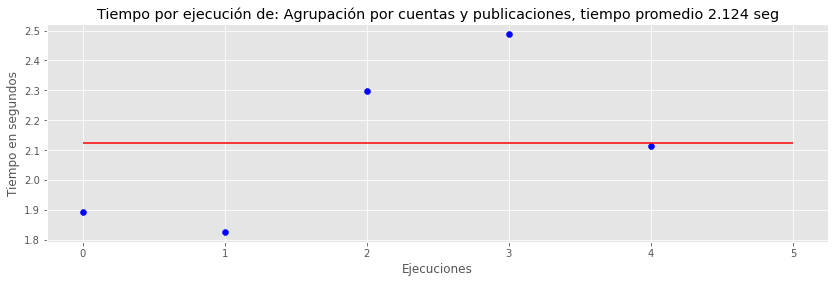

In [27]:
plot_time(g_data2, name='Agrupación por cuentas y publicaciones')

In [28]:
df_group_pub.show(5)

+-----------------------+--------------------+-----------+
|in_reply_to_screen_name|   last(screen_name)|count(name)|
+-----------------------+--------------------+-----------+
|   "<a href=""http:/...| pero sí podemos ...|          2|
|   "<a href=""https:...| impresoras de tí...|          7|
|   "[{""text"": ""de...|               22286|          1|
|           mattelsa_net|        he_espinosar|       1257|
|                     42| general de las L...|          1|
+-----------------------+--------------------+-----------+
only showing top 5 rows



In [29]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_pub = df_group_pub.orderBy("count(name)",ascending=False)
    s_data.append(timeit.default_timer() - start_time)

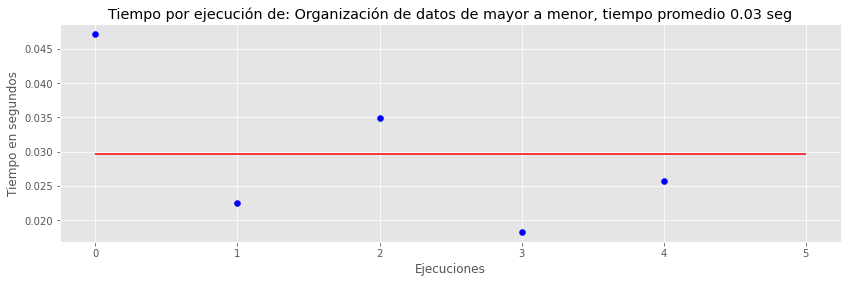

In [30]:
plot_time(s_data, name='Organización de datos de mayor a menor')

In [31]:
df_group_pub.show(5)

+-----------------------+-----------------+-----------+
|in_reply_to_screen_name|last(screen_name)|count(name)|
+-----------------------+-----------------+-----------+
|             netflixlat|   francojames_23|     100639|
|                   null|     juanazenere6|      13292|
|          rappicolombia|       pjj_puello|       6167|
|           mattelsa_net|     he_espinosar|       1257|
|        spotifycolombia|   karen_danielak|        992|
+-----------------------+-----------------+-----------+
only showing top 5 rows



## Búsqueda de palabras en un dataframe

En este prueba se busca un vector de palabras dentro de los comentarios del dataframe, posteriormente estos datos se agruparan por cuenta

In [73]:
def words_filter(df, words):
    df_m = deepcopy(df)
    df_m["word"] = None
    df_m.message = df_m.text.apply(lambda x: str(x).lower())
    for i in range(len(df_m)):
        for word in words:
            if str(df_m.text.iloc[i]).find(str(word)) > 0:
                df_m.word.iloc[i] = "ok"
            else:
                continue
    
    df_m_filter = df_m[df_m.word == "ok"]
    return df_m_filter

In [74]:
words = [['perro', 'coronavirus'], ['rappy', 'domicilios.com', 'uber'], ['whatsapp']]

In [76]:
#df_2 = df.sample(n=20000)
df_2 = pd.read_csv(FOLDER_DATA + FILE)
find_w = []
for i in range(num):
    start_time = timeit.default_timer()
    df_all_w = pd.DataFrame()
    for i in words:
        temp1 = words_filter(df_2, i)
        temp2 = temp1.groupby("name", as_index=False).id.count()
        df_all_w = pd.concat([df_all_w, temp2])
    find_w.append(timeit.default_timer() - start_time)

/home/oscar/anaconda3/envs/pySpark/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


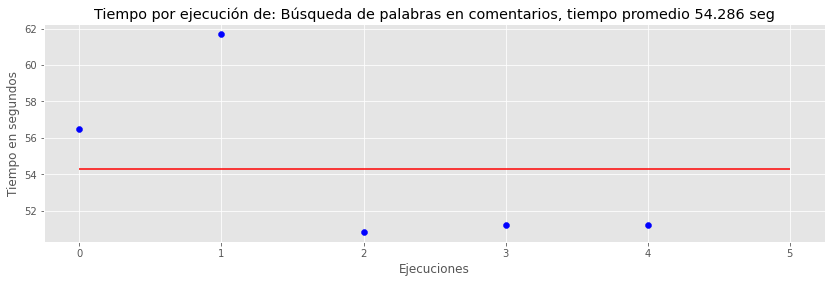

In [77]:
plot_time(find_w, name='Búsqueda de palabras en comentarios')

In [78]:
df_all_w

name  id
0   #estevirusloparamosunidos   1
1                   666d3v666   1
2                abi ayance 🌸   1
3                    abzurdah   1
4          agustina dominguez   1
..                        ...  ..
28            p. william cano   1
29               soul rebel 💥   1
30           tu cena perfecta   1
31                  will_i_am   1
32       🅴🆂🅲🅾🆁🆃🆂 🅴🅽 🅼🅾🅽🆃🅴🆁🆁🅴🆈   1

[274 rows x 2 columns]